In [2]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor

from matplotlib.animation import FuncAnimation

Object Oriented...

In [3]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

# test_data = datasets.MNIST(
#     root="data",
#     train=False,
#     download=True,
#     transform=ToTensor()
# )

In [177]:
training_images = []
training_labels = []
# for i in range(len(training_data)):
for i in range(100):         # just use the first 100 for now as there are 60000
    training_images.append(np.matrix.flatten(torch.Tensor.numpy(training_data[i][0])[0]))

    label = np.zeros(10)
    n = training_data[i][1]
    label[n] = 1
    training_labels.append(label)
training_images = np.array(training_images)
training_labels = np.array(training_labels)



print(np.shape(training_images))        # each element is an  array of 784 with a colour of each pixel in a 28x28 image
print(np.shape(training_labels))        # each element is an array of 10 zeros with a 1 in the place representing the correct digit


(100, 784)
(100, 10)


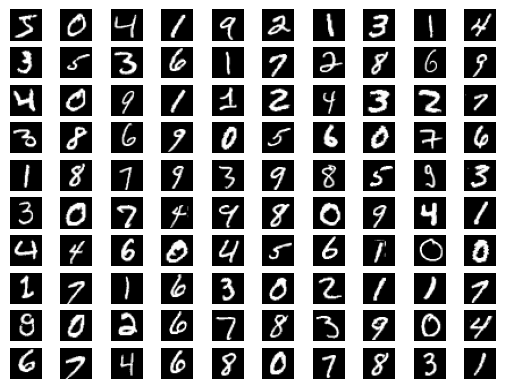

In [73]:
fig,axs = plt.subplots(10,10)
for i in range(100):
    axs[i//10,i%10].imshow(training_images[i].reshape(28,28),cmap='gray')
    axs[i//10,i%10].axis('off')


In [209]:
layer_sizes = (784,5,10)
net = NeuralNetwork(layer_sizes)
predictions = np.transpose(net.predict(training_images))
net.print_accuracy(training_images,training_labels)

accuracy = 11/100


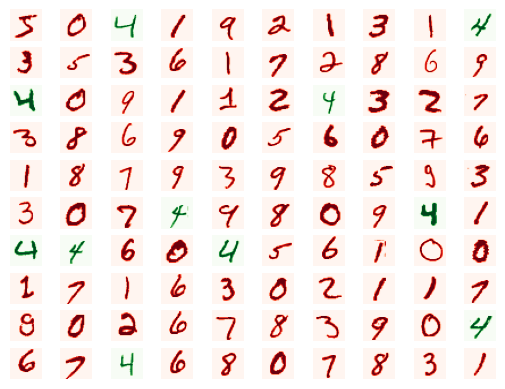

In [211]:
fig,axs = plt.subplots(10,10)
for i in range(len(predictions)):
    # axs[i//10,i%10].imshow(training_images[i].reshape(28,28),cmap='gray')
    axs[i//10,i%10].axis('off')
    # axs[i//10,i%10].set_title(f'P={np.argmax(predictions[i])}, L={np.argmax(training_labels[i])}')

    if np.argmax(predictions[i]) == np.argmax(training_labels[i]):
        axs[i//10,i%10].imshow(training_images[i].reshape(28,28),cmap='Greens')
    else:
        axs[i//10,i%10].imshow(training_images[i].reshape(28,28),cmap='Reds')
plt.show()


not object oriented...

In [4]:
training_images = []
training_labels = []
# for i in range(len(training_data)):


m = 1000
n = 500
for i in range(m):         # just use the first 100 for now as there are 60000
    training_images.append(np.matrix.flatten(torch.Tensor.numpy(training_data[i][0])[0]))

    label = np.zeros(10)
    n = training_data[i][1]
    label[n] = 1
    training_labels.append(label)
training_images = np.array(training_images)
training_labels = np.array(training_labels)



# print(np.shape(training_images))        # each element is an  array of 784 with a colour of each pixel in a 28x28 image
# print(np.shape(training_labels))        # each element is an array of 10 zeros with a 1 in the place representing the correct digit





Y_dev = np.transpose(training_labels[0:n])
X_dev = np.transpose(training_images[0:n])

Y_train = np.transpose(training_labels[n:m])
X_train = np.transpose(training_images[n:m])



X_train.shape

(784, 994)

In [376]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10,1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10,1) - 0.
    
    return W1, b1, W2, b2

# def sigmoid(Z):
#     return 1/(1+np.exp(-Z))

def ReLU(Z):
    return np.maximum(Z,0)

def ReLU_derivative(Z):
    return Z>0

def softmax(Z):
    return np.exp(Z)/sum(np.exp(Z))

def forward_propagation(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y):
    dZ2 = A2 - Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    number_correct = 0
    for i,pred in enumerate(predictions):
        if pred == np.argmax(np.transpose(Y)[i]):
            number_correct += 1
    return 100 * number_correct / len(predictions)


def evaluate(predictions, Y):
    correct = []
    number_correct = 0
    for i, prediction in enumerate(predictions):
        if prediction == np.argmax(np.transpose(Y)[i]):
            correct.append(i)
            number_correct += 1
    accuracy = 100 * number_correct / len(Y[0])
    return accuracy, correct



def make_predictions(X, W1, b1, W2, b2):                                # not for use on the test data...
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [402]:


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    global accuracy_array
    global dev_accuracy_array
    accuracy_array = []
    dev_accuracy_array = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_propagation(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_propagation(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

        # if i % 100 == 0:
        #     predictions = get_predictions(A2)
        #     accuracy, correct = evaluate(predictions, Y)
        #     print(f'Iteration {i}: Accuracy = {accuracy}%')

        #     fig,axs = plt.subplots(10,10)
        #     for j,_ in enumerate(predictions[:100]):
        #         axs[j//10, j%10].axis('off')
        #         if j in correct:
        #             axs[j//10,j%10].imshow(X[:,j].reshape(28,28),cmap='Greens')
        #         else:
        #             axs[j//10,j%10].imshow(X[:,j].reshape(28,28),cmap='gray')
        #     plt.show()
        if i % 5 == 0:
            predictions = get_predictions(A2)
            accuracy_array.append(get_accuracy(predictions,Y))



            ############ to compare accuracy on the test data to data that the model has not been trained on
            # dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
            # dev_accuracy_array.append(get_accuracy(dev_predictions, Y_dev))


        
    return W1, b1, W2, b2

In [403]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 2000)

In [347]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


77.5

In [399]:

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

79.0

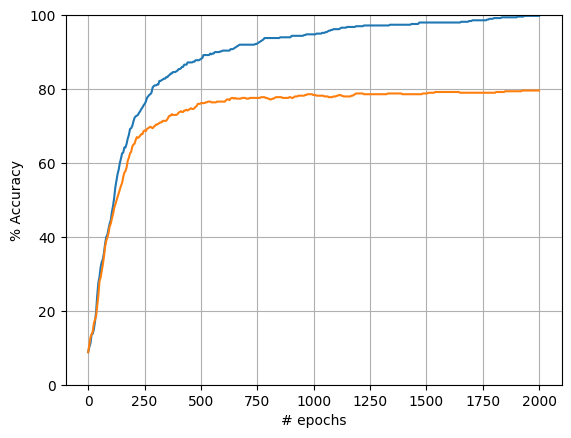

99.8


In [404]:
epochs = np.linspace(0,2000,400)
plt.plot(epochs,accuracy_array)
plt.plot(epochs,dev_accuracy_array)
plt.ylim([0,100])
plt.ylabel('% Accuracy')
plt.xlabel('# epochs')
plt.grid()
plt.show()

print(np.max(accuracy_array))

In [18]:
class NeuralNetwork2:
    def __init__(self, layer_sizes):
        weight_shapes = [(a,b) for a,b in zip(layer_sizes[1:],layer_sizes[:-1])]
        self.weights = [np.random.standard_normal(s)/np.sqrt(s[1]) for s in weight_shapes]
        self.biases = [np.zeros((s,1)) for s in layer_sizes[1:]]

        self.Z = [np.array([]) for _ in range(len(self.biases))]
        self.A = [np.array([]) for _ in range(len(self.biases))]

        self.dZ = [np.array([]) for _ in range(len(self.Z))]
        self.dW = [np.array([]) for _ in range(len(self.weights))] # probably wont work as its length but needs to be a multidimensional array...
        self.db = [np.array([]) for _ in range(len(self.biases))]

        self.accuracy_array = []


    def ReLU(self, Z):
        return np.maximum(Z,0)

    def ReLU_derivative(self, Z):
        return Z>0

    def softmax(self, Z):
        return np.exp(Z)/sum(np.exp(Z))
    


    def forward_propagation(self, X):
        # self.Z[0] = self.weights[0].dot(X) + self.biases[0]
        # self.A[0] = ReLU(self.Z[0])
        # self.Z[1] = self.weights[1].dot(self.A[0]) + self.biases[1]
        # self.A[1] = softmax(self.Z[1])



        for i in range(len(self.Z)):
            if i == 0:     # i = 0 => need to use the input as there are no previous node values
                self.Z[i] = self.weights[i].dot(X) + self.biases[i]
                self.A[i] = self.ReLU(self.Z[i])
            elif i == len(self.Z):    # final node so need to use softmax instead of ReLU
                self.Z[i] = self.weights[i].dot(self.A[i-1]) + self.biases[i]
                self.A[i] = self.softmax(self.Z[i])
            else:
                self.Z[i] = self.weights[i].dot(self.A[i-1]) + self.biases[i]
                self.A[i] = self.ReLU(self.Z[i])
    

    def backward_propagation(self, X, Y):
        # self.dZ[1] = self.A[1] - Y
        # self.dW[1] = self.dZ[1].dot(np.transpose(self.A[0])) / len(X)
        # self.db[1] = np.sum(self.dZ[1]) / len(X)
        # self.dZ[0] = np.transpose(self.weights[1]).dot(self.dZ[1]) * ReLU_derivative(self.Z[0])
        # self.dW[0] = self.dZ[0].dot(np.transpose(X)) / len(X)
        # self.db[0] = np.sum(self.dZ[0]) / len(X)



        for i in range(len(self.dZ)):
            j = len(self.dZ) - i -1

            if j == 0: # if input layer
                self.dZ[j] = np.transpose(self.weights[j+1]).dot(self.dZ[j+1]) * self.ReLU_derivative(self.Z[j])
                self.dW[j] = self.dZ[j].dot(np.transpose(X)) / len(X)
            elif i == 0: # if output layer (equivalent to saying if j==its max value)
                self.dZ[j] = self.A[j] - Y
                self.dW[j] = self.dZ[j].dot(np.transpose(self.A[j-1])) / len(X)

            else:    # if working between two hidden layers
                self.dZ[j] = np.transpose(self.weights[j+1]).dot(self.dZ[j+1]) * self.ReLU_derivative(self.Z[j])
                self.dW[j] = self.dZ[j].dot(np.transpose(self.A[j-1])) / len(X)


            self.db[j] = np.sum(self.dZ[j]) / len(X)



    def update_params(self, alpha):
        for i in range(len(self.weights)):
            self.weights[i] = self.weights[i] - alpha * self.dW[i]
            self.biases[i] = self.biases[i] - alpha * self.db[i]





    def get_predictions(self, A2):
        return np.argmax(A2, 0)
    
    def get_accuracy(self, predictions, Y):
        number_correct = 0
        for i,pred in enumerate(predictions):
            if pred == np.argmax(np.transpose(Y)[i]):
                number_correct += 1
        return 100 * number_correct / len(predictions)
    

    def gradient_descent(self, X, Y, alpha, iterations):
        for i in range(iterations):
            self.forward_propagation(X)
            self.backward_propagation(X, Y)
            self.update_params(alpha)


            if i%5 == 0:
                predictions = self.get_predictions(self.A[1])
                accuracy = self.get_accuracy(predictions, Y)
                # print(accuracy)

                self.accuracy_array.append(accuracy)



    def single_iteration(self, X, Y, alpha):
        self.forward_propagation(X)
        self.backward_propagation(X, Y)
        self.update_params(alpha)

    def make_predictions(self):
        raise NotImplementedError()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


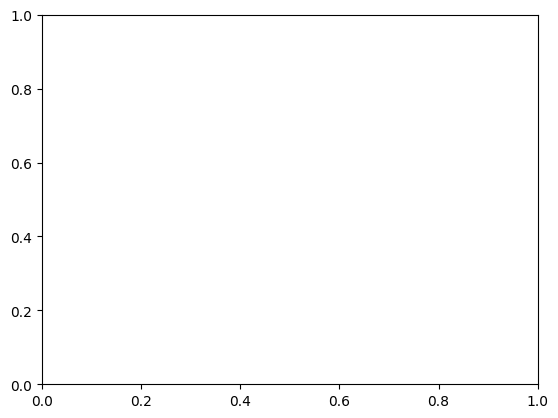

In [24]:

nn = NeuralNetwork2((784,10,10))
# nn.gradient_descent(X_train, Y_train, 0.1, 200)

# epochs = np.linspace(0,200,40)
# plt.plot(epochs,nn.accuracy_array)

fig,ax = plt.subplots()
def animate(iterations):
    accuracy = []
    for i in iterations:
        nn.single_iteration(X_train, Y_train,0.1)

        if i%10 == 0:     # only generate an accuracy data point for each 10 iterations to speed it up


            predictions = nn.get_predictions(nn.A[1])
            accuracy.append(nn.get_accuracy(predictions, Y_train))

            epochs = np.linspace(0,i,i/10)
            ax.plot(epochs, accuracy)
            ax.set_ylim([0,100])

anim = FuncAnimation(fig, animate, frames = 200, interval = 200, repeat = False)
plt.show()











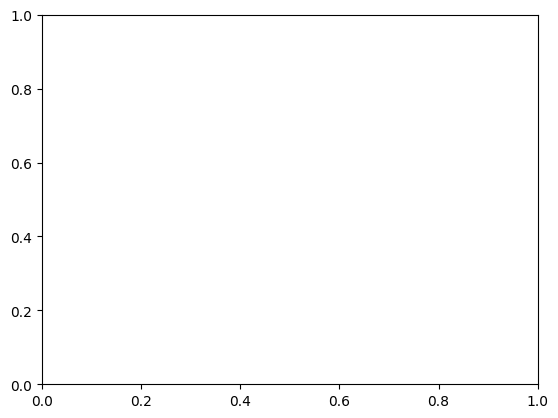

In [648]:
fig,ax = plt.subplots()

def animate(accuracy_array):
    epochs = np.linspace(0,5*len(accuracy_array), len(accuracy_array))
    ax.clear()
    ax.plot(epochs, accuracy_array)
    ax.set_xlim([0,200])
    ax.set_ylim([0,100])

anim = FuncAnimation(fig, animate, frames = 10000, interval = 100, repeat=False)
plt.show()

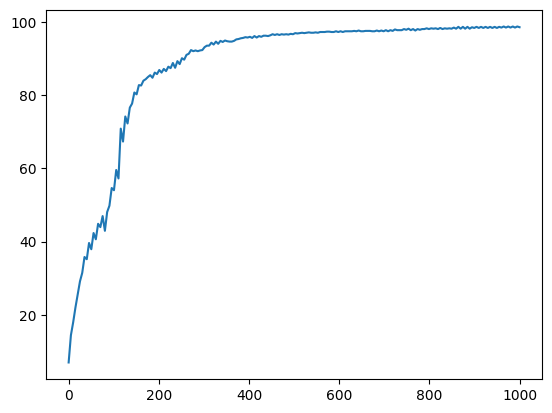

In [9]:
epochs = np.linspace(0,1000,200)
plt.plot(epochs,nn.accuracy_array)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/animation.py:879: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


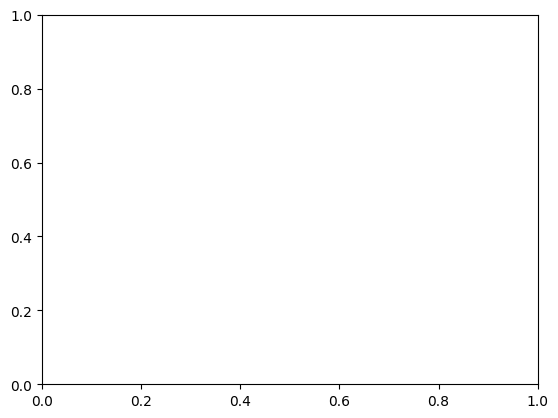

In [25]:
def sin(x):
    return np.sin(x)

fig,ax = plt.subplots()
def animate(i):
    x = np.linspace(0,10,100)
    y = sin(x)

    ax.plot(x[:i],y[:i])

anim = FuncAnimation(fig, animate, frames = 100, interval = 100, repeat = False)
plt.show()

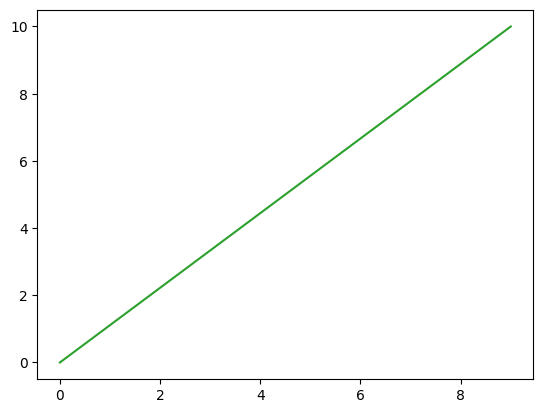

In [28]:
x = np.linspace(0,10,10)
plt.plot(x,color='C2')